In [2]:
pip install opencv-contrib-python

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
print(cv2.__version__)

4.9.0


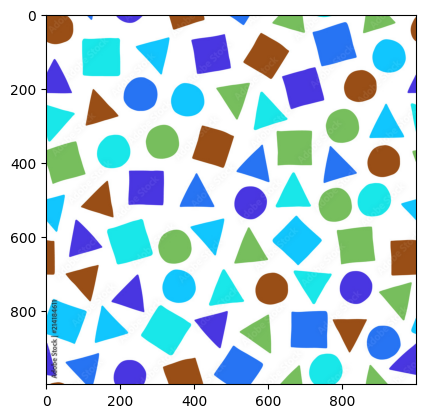

In [7]:
img = cv2.imread(r"C:\Users\ASUS\Desktop\img_proc\picture3.jpg")
plt.imshow(img)

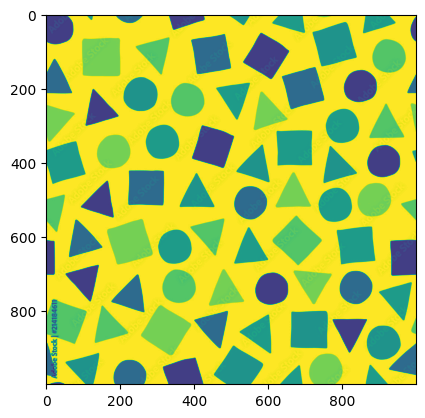

In [8]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

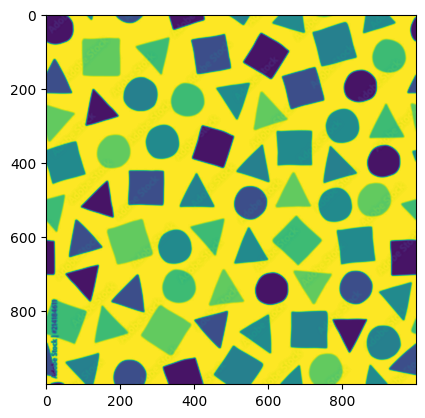

In [9]:
blured = cv2.GaussianBlur(gray,(7,7),0)
plt.imshow(blured)

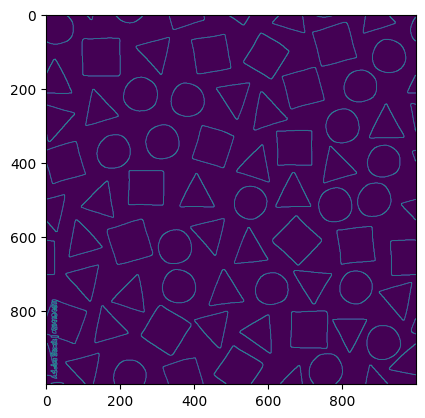

In [10]:
edges = cv2.Canny(blured,30,120)
plt.imshow(edges)

In [11]:
contours, _= cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

In [12]:
cv2.drawContours(img,contours, -1,(0,255,0),2)

array([[[255, 250, 255],
        [248, 255, 255],
        [246, 254, 254],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 251],
        [248, 255, 249],
        [249, 254, 252],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[250, 255, 250],
        [255, 253, 253],
        [251, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [13]:
for contour in contours:
    epsilon = 0.04 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    if len(approx) == 4:  # square has 4
        area = cv2.contourArea(contour)
        if area > 2000:
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 2)  

cv2.imshow('Squares with Bounding Boxes', img)
cv2.waitKey(0)
cv2.destroyAllWindows()